# TestCase 5

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config5.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 5
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 0}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 5
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version == 1:
    from testcases.networks.test_2D.test_5.test_5_v1 import Run_laplacian2D,Poisson_2D
elif version == 2:
    from testcases.networks.test_2D.test_5.test_5_v2 import Run_laplacian2D,Poisson_2D 
elif version == 3:
    from testcases.networks.test_2D.test_5.test_5_v3 import Run_laplacian2D,Poisson_2D 
from testcases.problem.problem_2D import TestCase5
problem = TestCase5(version=version)

Using device: cpu
torch loaded; device is cpu


bigcenter :  [0.0, 0.0]
bigradius :  1.0
smallcenter :  [0.0, 0.0]
smallradius :  0.25
Threshold of the sampling:  0.0
Threshold of the sampling:  0.0
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe5.pth
network loaded
Error  tensor([0.0009])


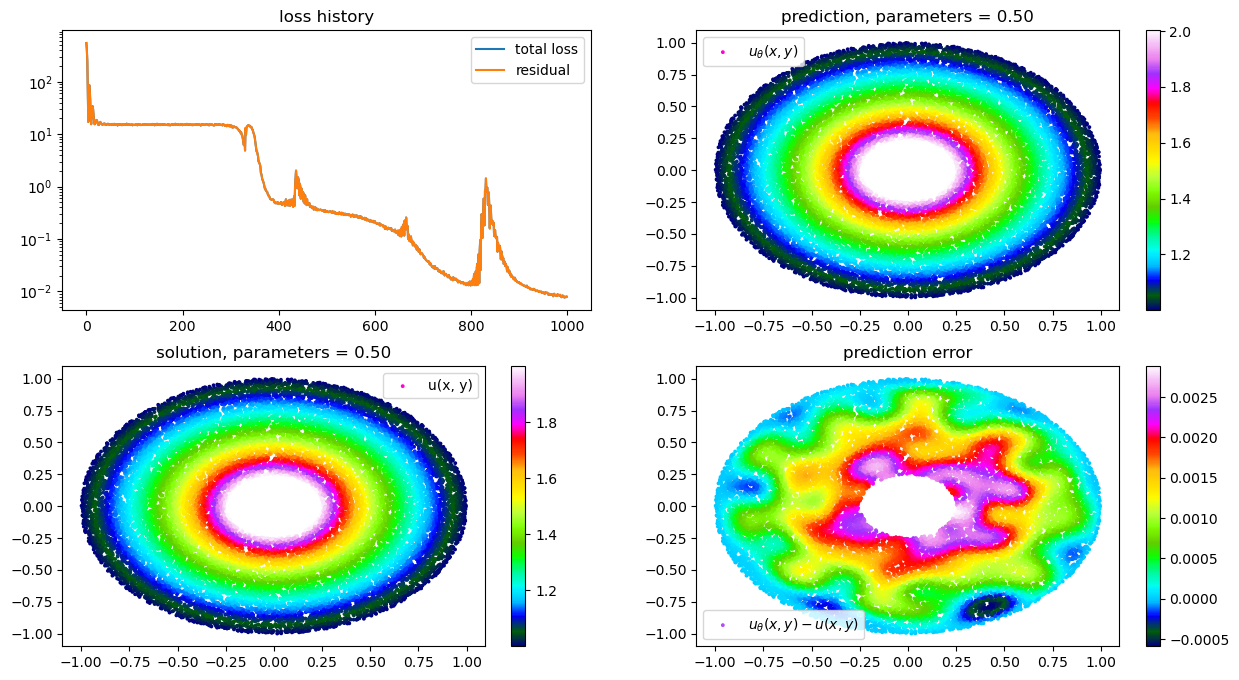

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [27]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree1.csv


## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree1.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree2.csv
## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree3.csv


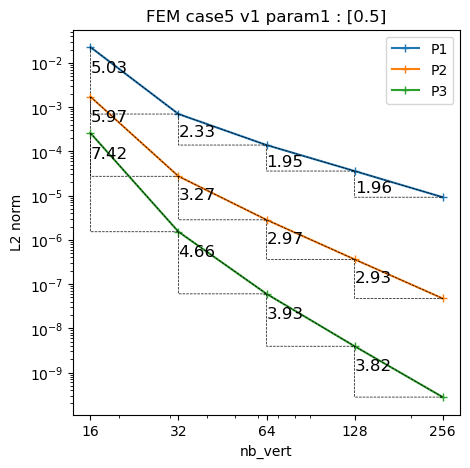

In [13]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [30]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=True)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.005633800733210699
V created with  16  vertices and degree  1  : h = 0.16660094771444728
Calling FFC just-in-time (JIT) compiler, this may take some time.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 1053 nodes for 527 points.
Building point search tree to accelerate distance queries.
nb_vert=16, norme_L2=0.003897482726932002
Computed bounding box tree with 929281 nodes for 464641 points.
V created with  32  vertices and degree  1  : h = 0.08694977804807888
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3893 nodes for 1947 points.
nb_vert=32, norme_L2=0.0030094193617911237
V created with  64  vertices and degree  1  : h = 0.04347576862597117
Building point search tree to accelerate distance queries.
Computed bounding box tree with 15525 nodes for 7763 points.
nb_vert=64, norme_L2=0.00026487490

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.005633800733210699
V created with  16  vertices and degree  1  : h = 0.16660094771444728
Building point search tree to accelerate distance queries.
Computed bounding box tree with 1053 nodes for 527 points.
Building point search tree to accelerate distance queries.
nb_vert=16, norme_L2=6.149866771523818e-05
Computed bounding box tree with 929281 nodes for 464641 points.
V created with  32  vertices and degree  1  : h = 0.08694977804807888
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3893 nodes for 1947 points.
nb_vert=32, norme_L2=1.8288449689086304e-05
V created with  64  vertices and degree  1  : h = 0.04347576862597117
Building point search tree to accelerate distance queries.
Computed bounding box tree with 15525 nodes for 7763 points.
nb_vert=64, norme_L2=4.961602608377142e-06
V created with  128  vertices and degree  1  : h = 0.02

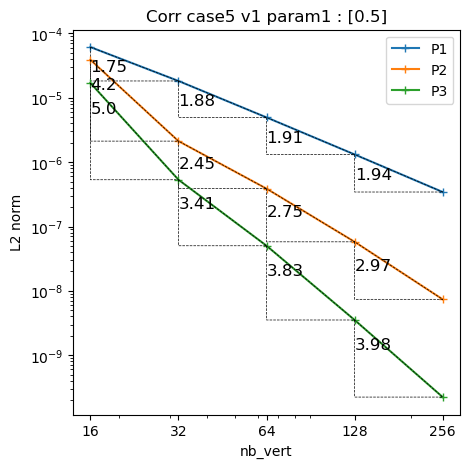

In [32]:
error_estimations.run_corr_alldeg(u_theta,new_run=True,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase5/version1/cvg/param1/FEM_case5_v1_param1_degree3.csv


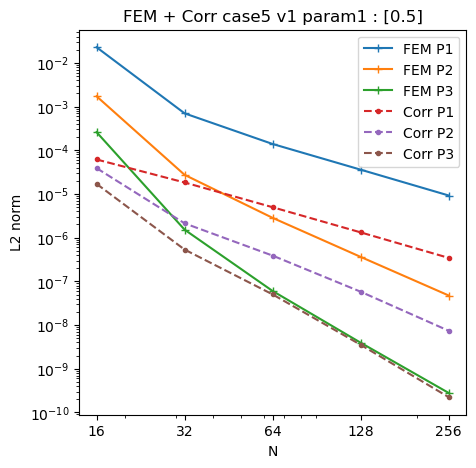

In [33]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [34]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp